# Word Representation in Biomedical Domain

Before you start, please make sure you have read this notebook. You are encouraged to follow the recommendations but you are also free to develop your own solution from scratch. 

## Marking Scheme

- Biomedical imaging project: 40%
    - 25%: accuracy of the final model on the test set
    - 15%: rationale of model design and final report
- Natural language processing project: 40%
    - 30%: completeness of the project
    - 10%: final report
- Presentation skills and team work: 20%


This project forms 40\% of the total score for summer/winter school. The marking scheme of each part of this project is provided below with a cap of 100\%.

You are allowed to use open source libraries as long as the libraries are properly cited in the code and final report. The usage of third-party code without proper reference will be treated as plagiarism, which will not be tolerated.

You are encouraged to develop the algorithms by yourselves (without using third-party code as much as possible). We will factor such effort into the marking process.

## Setup and Prerequisites 

Recommended environment

- Python 3.7 or newer
- Free disk space: 100GB

Download the data

```sh
# navigate to the data folder
cd data

# download the data file
# which is also available at https://www.semanticscholar.org/cord19/download
wget https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2021-07-26/document_parses.tar.gz

# decompress the file which may take several minutes
tar -xf document_parses.tar.gz

# which creates a folder named document_parses
```

## Global Variable We Use Throughout the Jupyter Notebook

1. **json_file_path1/2**: the path of json files
2. **result_path1/2**: the path of resulting files
3. **biomedical_entity**: a list contains all entities extracted from the corpora
4. **final_text_list**: a list contains strings extracted from all files, one item stands for one string extracted from one file
5. **text**: tokenized corpora
6. **biomedical_entity_list**: a list contains all entities after selection for only one-word entity
7. **biomedical_entity_index_list**: a list contains the index of the one-word entity in the vocabulary

## Part 1 (20%): Parse the Data

The JSON files are located in two sub-folders in `document_parses`. You will need to scan all JSON files and extract text (i.e. `string`) from relevant fields (e.g. body text, abstract, titles).

You are encouraged to extract full article text from body text if possible. If the hardware resource is limited, you can extract from abstract or titles as alternatives. 

Note: The number of JSON files is around 425k so it may take more than 10 minutes to parse all documents.

For more information about the dataset: https://www.semanticscholar.org/cord19/download

Recommended output:

- A list of text (`string`) extracted from JSON files.

In [ ]:
###################
# TODO: add your solution
import json
import os

json_file_path1 = "document_parses/pdf_json/"
json_file_path2 = "document_parses/pmc_json/"

result_path1 = "document/pdf_result/"
result_path2 = "document/pmc_result/"


def f_out(f_path, str):
    if (str != ""):
        fo=open(f_path,"a+")
        fo.write(str + '\n')
        return


for json_file_name in os.listdir(json_file_path1):
    if json_file_name.endswith("json"):
        json_file_path = os.path.join(json_file_path1 + json_file_name)
        result_path = os.path.join(result_path1 + json_file_name.split('.json')[0] + ".txt")
    with open(json_file_path, "r") as jf:
        json_dict = json.load(jf)

        if 'title' in json_dict['metadata']:
            f_out(result_path, json_dict['metadata']['title'])

        if 'abstract' in json_dict:
            for content in json_dict['abstract']:
                if 'text' in content:
                    f_out(result_path, content.get('text', ""))
        
        if 'body_text' in json_dict:
            for content in json_dict['body_text']:
                if 'text' in content:
                    f_out(result_path, content.get('text', ""))


for json_file_name in os.listdir(json_file_path2):
    if json_file_name.endswith("json"):
        json_file_path = os.path.join(json_file_path2 + json_file_name)
        result_path = os.path.join(result_path2 + json_file_name.split('.json')[0] + ".txt")
    with open(json_file_path, "r") as jf:
        json_dict = json.load(jf)

        if 'title' in json_dict['metadata']:
            f_out(result_path, json_dict['metadata']['title'])

        if 'abstract' in json_dict:
            for content in json_dict['abstract']:
                if 'text' in content:
                    f_out(result_path, content.get('text', ""))

        if 'body_text' in json_dict:
            for content in json_dict['body_text']:
                if 'text' in content:
                    f_out(result_path, content.get('text', ""))

###################

## Part 2 (30%): Tokenization

Traverse the extracted text and segment the text into words (or tokens).

The following tracks can be developed in independentely. You are encouraged to divide the workload to each team member.

Recommended output:

- Tokenizer(s) that is able to tokenize any input text.

Note: Because of the computation complexity of tokenizers, it may take hours/days to process all documents. Which tokenizer is more efficient? Any idea to speedup?

### Track 2.1 (10%): Use split()

Use the standard `split()` by Python.

### Track 2.2 (10%): Use NLTK or SciSpaCy

NLTK tokenizer: https://www.nltk.org/api/nltk.tokenize.html

SciSpaCy: https://github.com/allenai/scispacy

Note: You may need to install NLTK and SpaCy so please refer to their websites for installation instructions.

### Track 2.3 (10%): Use Byte-Pair Encoding (BPE)

Byte-Pair Encoding (BPE): https://huggingface.co/transformers/tokenizer_summary.html

Note: You may need to install Huggingface's transformers so please refer to its website for installation instructions.

### Track 2.4 (Bonus +5%): Build new Byte-Pair Encoding (BPE)

This track may be dependent on track 2.3.

The above pre-built tokenization methods may not be suitable for biomedical domain as the words/tokens (e.g. diseases, sympotoms, chemicals, medications, phenotypes, genotypes etc.) can be very different from the words/tokens commonly used in daily life. Can you build and train a new BPE model for biomedical domain in particular?

### Open Question (Optional):

- What are the pros and cons of the above tokenizers?

In [1]:
biomedical_entity = []

### Tokenizer Implementation

In [2]:
###################
# TODO: add your solution

def tokenizer_split(str):
    return str.split(" ")

def tokenizer_nltk(str):
    import nltk
    from nltk.tokenize import word_tokenize
    return word_tokenize(str)

def tokenizer_scispacy(str):
    import scispacy
    import spacy
    
    nlp = spacy.load("en_core_sci_md")
    my_doc = nlp(str)
    biomedical_entities = my_doc.ents

    token_list = []
    for token in my_doc:
        token_list.append(token)
  
    return token_list

def BPE_general(text):
    from transformers import GPT2Tokenizer
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2", add_prefix_space=True)

    token_list = []
    for token in tokenizer.tokenize(text):
        token_list.append(token)
        return token_list

###################

### Trained BPE Tokenizer

In [3]:
import os
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.pre_tokenizers import Whitespace
from tokenizers.trainers import BpeTrainer

files = list()

def DirAll(pathName):
    if os.path.exists(pathName):
        fileList = os.listdir(pathName)
        for f in fileList:
            if f == "$RECYCLE.BIN" or f == "System Volume Information":
                continue
            f = os.path.join(pathName, f)
            if os.path.isdir(f):
                DirAll(f)
            else:
                dirName = os.path.dirname(f)
                baseName = os.path.basename(f)
                if dirName.endswith(os.sep):
                    files.append(dirName + baseName)
                else:
                    files.append(dirName + os.sep + baseName)
    return files


tokenizer = Tokenizer(BPE(unk_token="[UNK]"))

trainer = BpeTrainer(vocab_size=600000, min_frequency=2, special_tokens=["[UNK]"])
tokenizer.pre_tokenizer = Whitespace()

tokenizer.train(files=DirAll("path"), trainer=trainer)
tokenizer.save("tokenizer-wiki.json")
tokenizer = Tokenizer.from_file("tokenizer-wiki.json")

### Preprocessing on the corpora before tokenizing

In [4]:
import re

def preprocess(text):
    
    # Replace punctuation
    text = text.lower()
    text = text.replace('.', ' ')
    text = text.replace(',', ' ')
    text = text.replace('"', ' ')
    text = text.replace(';', ' ')
    text = text.replace('!', ' ')
    text = text.replace('?', ' ')
    text = text.replace('(', ' ')
    text = text.replace(')', ' ')
    text = text.replace('--', ' ')
    text = text.replace('?', ' ')
    text = text.replace('\n', ' ')
    text = text.replace(':', ' ')
    text = text.replace('[', ' ')
    text = text.replace(']', ' ')
    
    # advance: replace number and error codes
    text = re.sub(r'[^A-Za-z0-9\s]+',"", text)

    return text

In [5]:
import os

src_path1 = "document/pdf_result/"
src_path2 = "document/pmc_result/"

final_text_list = []
file_count = 0

# due to the limitation of the hardware
# the input file size was restricted
# read in 500 txt file in pdf_result
for txt_file_name in os.listdir(src_path1):
    if file_count == 500:
        break
    else:
        if txt_file_name.endswith("txt"):
            txt_file_path = os.path.join(src_path1 + txt_file_name)
        with open(txt_file_path, "r", encoding='utf-8') as tf:
            file_count += 1
            text = tf.read()
            text = preprocess(text)
            final_text_list.append(text)

# if the computational resources allowed
# feel free to uncomment the below code

# read in all txt file in pmc_result
# for txt_file_name in os.listdir(src_path2):
#     if txt_file_name.endswith("txt"):
#         txt_file_path = os.path.join(src_path2 + txt_file_name)
#     with open(txt_file_path, "r", encoding='utf-8') as tf:
#         text = tf.read()
#         text = preprocess(text)
#         final_text_list.append(text)

In [6]:
text = []
for string in final_text_list:
    text.extend(tokenizer_nltk(string))
    del string

In [7]:
# printing all result might exceed the IOPub data rate of Jupyter Notebook
print(text[:100])
print(len(text))

['multifaceted', 'covid19', 'russian', 'experience', 'according', 'to', 'current', 'live', 'statistics', 'at', 'the', 'time', 'of', 'editing', 'this', 'letter', 'russia', 'has', 'been', 'the', 'third', 'country', 'in', 'the', 'world', 'to', 'be', 'affected', 'by', 'covid19', 'with', 'both', 'new', 'cases', 'and', 'death', 'rates', 'rising', 'it', 'remains', 'in', 'a', 'position', 'of', 'advantage', 'due', 'to', 'the', 'later', 'onset', 'of', 'the', 'viral', 'spread', 'within', 'the', 'country', 'since', 'the', 'worldwide', 'disease', 'outbreak', 'the', 'first', 'step', 'in', 'fighting', 'the', 'epidemic', 'was', 'nationwide', 'lock', 'down', 'on', 'march', '30', 'th', '2020', 'most', 'of', 'the', 'multidisciplinary', 'hospitals', 'have', 'been', 'repurposed', 'as', 'dedicated', 'covid19', 'centres', 'so', 'the', 'surgeons', 'started', 'working', 'as', 'infectious', 'disease', 'specialists', 'such']
1892889


### Extract Biomedical Entity Into a List

In [8]:
import scispacy
import spacy
import collections

biomedical_entity_label_dict = collections.defaultdict(str)

nlp = spacy.load("en_ner_bionlp13cg_md")
for string in final_text_list:
    string = preprocess(string)
    my_doc = nlp(string)
    for token in my_doc.ents:
        biomedical_entity.append(str(token).strip())
        if token not in biomedical_entity_label_dict:
            biomedical_entity_label_dict[str(token).strip()] = str(token.label_)

biomedical_entity = list(set(biomedical_entity))

In [9]:
print(biomedical_entity[:500])

count = 0
for key in biomedical_entity_label_dict:
    if count == 1000:
        break
    print("key: %s, value: %s" % (key, biomedical_entity_label_dict[key]))
    count += 1

['easytouse', 'individuals  1   2   3   4', 'pdchip', 'pk 1  2', 'worldwill', '3', 'ns5 237245', 'bpifb6', 'prostaglandin  pge 2', 'escherichia coli  o111 b4  endotoxin', 'hcc   figure 5b', 'wesentlicher surrogatparameter', 'converting enzyme 2', 'quirrgicos  adems', 'viperin', 'cellular ribonucleotide reductase', 'corn cob', 'human complement c3', 'michaelismenten', 'eine kontaktnachverfolgung', '12 3 6 mannosidase', 'majorit', 'nasal spray', 'obamawatcher com', 'phnomen', 'cial', 'gerba 2006', 'clulas huspedes alveolares', 'bmmsc', 'renal clearance', 'pmsf', 'aaltonen  2013', 'hdacautophagy', 'il17 receptor', 'tcellmediated', 'sklearn tree decisiontreeclassifier', 'conjugate pad', 'mucusdwelling verrucomicrobia', 'hcovhku1', 'rachen', 'cryptocurrency  rawnsley 2018', 'septum', 'patients  33', '21 cfr', 'human papilloma viruses  polioviruses', 'cells   figure 4b e', '1 inch', 'daraus resultierende infektionen und symptome', 'human tailgater', 'org10 1007s1137702000488x', 'virusafe in 

## Part 3 (30%): Build Word Representations

Build word representations for each extracted word. If the hardware resource is limited, you may limit the vocabulary size up to 10k words/tokens (or even smaller) and the dimension of representations up to 256.

The following tracks can be developed independently. You are encouraged to divide the workload to each team member.

### Track 3.1 (15%): Use N-gram Language Modeling

N-gram Language Modeling is to predict a target word by using `n` words from previous context. Specifically,

$P(w_i | w_{i-1}, w_{i-2}, ..., w_{i-n+1})$

For example, given a sentence, `"the main symptoms of COVID-19 are fever and cough"`, if $n=7$, we use previous context `["the", "main", "symptoms", "of", "COVID-19", "are"]` to predict the next word `"fever"`.

More to read: https://web.stanford.edu/~jurafsky/slp3/3.pdf

Recommended outputs:

- A fixed vector for each word/token.

### Track 3.2 (15%): Use Skip-gram with Negative Sampling

In skip-gram, we use a central word to predict its context. Specifically,

$P(w_{c-m}, ... w_{c-1}, w_{c+1}, ..., w_{c+m} | w_c)$

As the learning objective of skip-gram is computational inefficient (summation of entire vocabulary $|V|$), negative sampling is commonly applied to accelerate the training.

In negative sampling, we randomly select one word from the context as a positive sample, and randomly select $K$ words from the vocabulary as negative samples. As a result, the learning objective is updated to

$L = -\log\sigma(u^T_{t} v_c) - \sum_{k=1}^K\log\sigma(-u^T_k v_c)$, where $u_t$ is the vector embedding of positive sample from context, $u_k$ are the vector embeddings of negative samples, $v_c$ is the vector embedding of the central word, $\sigma$ refers to the sigmoid function.

More to read http://web.stanford.edu/class/cs224n/readings/cs224n-2019-notes01-wordvecs1.pdf section 4.3 and 4.4

Recommended outputs:

- A fixed vector for each word/token.

### Track 3.3 (Bonus +5%): Use Contextualised Word Representation by Masked Language Model (MLM)

BERT introduces a new language model for pre-training named Masked Language Model (MLM). The advantage of MLM is that the word representations by MLM will be contextualised.

For example, "stick" may have different meanings in different context. By N-gram language modeling and word2vec (skip-gram, CBOW), the word representation of "stick" is fixed regardless of its context. However, MLM will learn the representation of "stick" dynamatically based on context. In other words, "stick" will have different representations in different context by MLM.

More to read: http://jalammar.github.io/illustrated-bert/ and https://arxiv.org/pdf/1810.04805.pdf

Recommended outputs:

- An algorithm that is able to generate contextualised representation in real time.

### Track 3.1 N-gram Implementation

In [ ]:
###################
# TODO: add your solution

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import re

class NGramLanguageModeler(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out, dim=1)
        return log_probs

In [ ]:
def nn_train(test_sentence):
    torch.manual_seed(1)
    CONTEXT_SIZE = 3
    EMBEDDING_DIM = 10  

    # we should tokenize the input, but we will ignore that for now build a list of tuples.
    # Each tuple is ([ word_i-CONTEXT_SIZE, ..., word_i-1 ], target word)
    ngrams = [([test_sentence[i - j - 1]
                for j in range(CONTEXT_SIZE)], test_sentence[i])
              for i in range(CONTEXT_SIZE, len(test_sentence))]
    # Print the first 3, just so you can see what they look like.
    # print(ngrams)

    vocab = set(test_sentence)
    word_to_ix = {word: i for i, word in enumerate(vocab)}

    losses = []
    loss_function = nn.NLLLoss()
    model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
    optimizer = optim.SGD(model.parameters(), lr=0.001)  #learning rate

    for epoch in range(10): 
        total_loss = 0
        for context, target in ngrams:

            # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
            # into integer indices and wrap them in tensors)
            context_idxs = torch.tensor([word_to_ix[w] for w in context],
                                        dtype=torch.long)

            # Step 2. Recall that torch *accumulates* gradients. Before passing in a
            # new instance, you need to zero out the gradients from the old instance
            model.zero_grad()

            # Step 3. Run the forward pass, getting log probabilities over next words
            log_probs = model(context_idxs)

            # Step 4. Compute your loss function. (Again, Torch wants the target word wrapped in a tensor)
            loss = loss_function(
                log_probs, torch.tensor([word_to_ix[target]],
                                        dtype=torch.long))

            # Step 5. Do the backward pass and update the gradient
            loss.backward()  
            optimizer.step()

            # Get the Python number from a 1-element Tensor by calling tensor.item()
            total_loss += loss.item()
        losses.append(total_loss)
    print("loss is",
          losses)  # The loss decreased every iteration over the training data!

    # To get the embedding of a particular word
    # print(model.embeddings.weight[word_to_ix["a"]])
    return word_to_ix, model.embeddings.weight

def predict(word_to_ix, weight, input_word):
    input_embedding_list = weight.tolist()
    word_index = word_to_ix[input_word]
    print("\"" + input_word + "\": " + str(input_embedding_list[word_index]))

###################

In [ ]:
word_to_ix, weight = nn_train(text)

predict(word_to_ix, weight, "covid19")

### Track 3.2 Skip-gram with Negative Sampling Implementation

In [12]:
###################
# TODO: add your solution

import random
import numpy as np
import torch
from torch import nn
import torch.optim as optim
from collections import Counter

class pre_processing():

    def __init__(self, words, vocabulary_size):
        self.words = words
        self.vocabulary_size = vocabulary_size
    
    def generate_dictionary(self):
        word_counts = [['UNK', -1]]
        word_counts.extend(Counter(self.words).most_common(self.vocabulary_size - 1))
        # sorting the words from most to least frequent
        
        sorted_vocab = dict()
        for idx, tuple in enumerate(word_counts):
            sorted_vocab[tuple[0]] = idx

        # generate index list and calculate the number of unknown
        int_words = list()
        unk_count = 0
        for word in self.words:
            if word in sorted_vocab:
                index = sorted_vocab[word]
            else:
                unk_count += 1
                index = 0
            int_words.append(index)
        word_counts[0][1] = unk_count

        # create int_to_vocab dictionaries
        index_to_vocab = {idx: word for idx, word in enumerate(sorted_vocab)}
        # create vocab_to_int dictionaries
        vocab_to_index = {word: idx for idx, word in index_to_vocab.items()}

        return int_words, word_counts, vocab_to_index, index_to_vocab


class wr_skip_gram(nn.Module):

    def __init__(self, int_words, word_counts, vocab_to_index, index_to_vocab, embed_dimens, batch_size, num_neg_sample, num_skips, skip_window, learning_rate=0.01):
        super().__init__()
        
        self.int_words = int_words
        self.word_counts = word_counts
        self.vocab_to_index = vocab_to_index
        self.index_to_vocab = index_to_vocab

        # subsampling, output the trained word index list
        # don't need it (according to my dear tutor)
        self.train_words = int_words
        
        # the count of the all input words
        total_count = len(self.int_words)
        # the frequency of each word
        self.word_freq = {word: count/total_count for word, count in word_counts}
        # the size of the vocabulary
        self.vocab_size = len(vocab_to_index)
        # the embedding dimension (also the size of the word vector)
        self.embed_dimens = embed_dimens
        self.batch_size = batch_size
        self.num_neg_sample = num_neg_sample
        self.num_skips = num_skips
        self.skip_window = skip_window
        self.learning_rate = learning_rate
        self.noise_dist = None

        # define embedding layers for input and output 
        self.input_embedding = nn.Embedding(self.vocab_size, embed_dimens, sparse=False)
        self.output_embedding = nn.Embedding(self.vocab_size, embed_dimens, sparse=False)

        # initialize embedding table with uniform distribution
        self.input_embedding.weight.data.uniform_(-1, 1)
        self.output_embedding.weight.data.uniform_(-1, 1)

    def forward_input(self, input_vector):
        return self.input_embedding(input_vector)
    
    def forward_output(self, output_vector):
        return self.output_embedding(output_vector)
    
    def forward_noise(self, batch_size, n_samples):
        if self.noise_dist is None:
            noise_dist = torch.ones(self.vocab_size)
        else:
            noise_dist = self.noise_dist
        
        noise_words = torch.multinomial(noise_dist,
                                        batch_size * n_samples,
                                        replacement=True)

        device = 'cuda' if self.output_embedding.weight.is_cuda else 'cpu'
        noise_words = noise_words.to(device)

        # reshape the embeddings so that they have dims
        noise_words = self.output_embedding(noise_words)
        noise_words = noise_words.view(batch_size, n_samples, self.embed_dimens)

        return noise_words
    
    def subsampling(self):
        threshold = 1e-5
        word_counts = self.word_counts
        total_count = len(self.int_words)
        self.word_freq = {word: count/total_count for word, count in word_counts}
        
        # probability for disgard = 1 - sqrt(threshold / frequency of words) 
        print(word_counts[:30])
        p_discard = {word: 1-np.sqrt(threshold/self.word_freq[word]) for word, _ in word_counts}
        
        print(p_discard)
        # discard some of the frequent word
        train_words = [word for word in self.int_words if random.random() < (1 - p_discard[word])]

        return train_words

    def target_index(self, words, idx, skip_window):
        start_idx = idx - skip_window if (idx - skip_window) > 0 else 0
        stop_idx = idx + skip_window

        target_index = words[start_idx:idx] + words[idx+1: stop_idx+1]

        return list(target_index)

    def generate_batch(self, words, batch_size, num_skips, skip_window):
        assert num_skips <= 2 * skip_window
        num_batches = len(words)//batch_size
        
        # only want full batches
        words = words[:num_batches*batch_size]

        # generate batches
        for idx in range(0, len(words), batch_size):
            input = []
            target  = []
            batch = words[idx:idx+batch_size]

            for idx_in_batch in range(len(batch)):
                batch_center_word = batch[idx_in_batch]
                batch_output = self.target_index(batch, idx_in_batch, skip_window)
                input.extend(batch_output)
                target.extend([batch_center_word]*len(batch_output))
            yield input, target
    
    def train(self):
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        word_freq = np.array(sorted(self.word_freq.values(), reverse=True))
        unigram_dist = word_freq/word_freq.sum()
        self.noise_dist = torch.from_numpy(unigram_dist**(0.75)/np.sum(unigram_dist**(0.75)))

        # initialize for model and loss
        criterion = neg_sample()
        optimizer = optim.Adam(self.parameters(), lr=self.learning_rate)

        # parameter of epoch
        epoch = 5
        step_count = 0
        print_period = 1000

        print("Training...")
        for e in range(epoch):
            # input, target
            for input_words, target_words in self.generate_batch(self.train_words, self.batch_size, self.num_skips, self.skip_window):
                step_count += 1
                inputs, targets = torch.LongTensor(input_words), torch.LongTensor(target_words)
                inputs, targets = inputs.to(device), targets.to(device)

                input_embedding_vector = model.forward_input(inputs)
                output_embedding_vector = model.forward_output(targets)
                noise_vectors = model.forward_noise(inputs.shape[0], self.num_neg_sample)

                loss = criterion(input_embedding_vector, output_embedding_vector, noise_vectors)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                if step_count % print_period == 0:
                    print("Current Epoch: {}/{}".format(e+1, epoch))
                    print("Loss: ", loss.item())
                    print("----------------------------------------")

    def get_list_vector(self):
        sd = self.state_dict()
        return sd['input_embedding.weight'].tolist()

    def predict(self, input_word):
        input_embedding_list = self.get_list_vector()
        word_index = vocab_to_index[input_word]
        print("\"" + input_word + "\": " + str(input_embedding_list[word_index]))


class neg_sample(nn.Module):
    
    def __init__(self):
        super().__init__()

    def forward(self, input_vectors, output_vectors, noise_vectors):
        batch_size, embed_size = input_vectors.shape

        input_vectors = input_vectors.view(batch_size, embed_size, 1)

        output_vectors = output_vectors.view(batch_size, 1, embed_size)

        # log-sigmoid
        out_loss = torch.bmm(output_vectors, input_vectors).sigmoid().log()
        out_loss = out_loss.squeeze()

        # incorrect log-sigmoid loss
        noise_loss = torch.bmm(noise_vectors.neg(), input_vectors).sigmoid().log()
        noise_loss = noise_loss.squeeze().sum(1)

        return -(out_loss + noise_loss).mean()

In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
vocabulary_size = 10000
embed_dimension = 300
batch_size = 512
number_of_negative_samples = 5
num_skips = 4
skip_window = 2
learning_rate = 0.003


prep = pre_processing(text, vocabulary_size=vocabulary_size)
int_words, word_counts, vocab_to_index, index_to_vocab = prep.generate_dictionary()
model = wr_skip_gram(int_words=int_words,
                     word_counts=word_counts,
                     vocab_to_index=vocab_to_index,
                     index_to_vocab=index_to_vocab,
                     embed_dimens=embed_dimension,
                     batch_size=batch_size, 
                     num_neg_sample=number_of_negative_samples, 
                     num_skips=num_skips, 
                     skip_window=skip_window, 
                     learning_rate=learning_rate).to(device)
model.train()

###################

Training...
Current Epoch: 1/5
Loss:  4.026627063751221
----------------------------------------
Current Epoch: 1/5
Loss:  3.063833236694336
----------------------------------------
Current Epoch: 1/5
Loss:  3.226202964782715
----------------------------------------
Current Epoch: 2/5
Loss:  2.8656840324401855
----------------------------------------
Current Epoch: 2/5
Loss:  2.4104626178741455
----------------------------------------
Current Epoch: 2/5
Loss:  2.262751340866089
----------------------------------------
Current Epoch: 2/5
Loss:  2.4145777225494385
----------------------------------------
Current Epoch: 3/5
Loss:  2.2650930881500244
----------------------------------------
Current Epoch: 3/5
Loss:  2.3335022926330566
----------------------------------------
Current Epoch: 3/5
Loss:  2.2516841888427734
----------------------------------------
Current Epoch: 3/5
Loss:  1.9697835445404053
----------------------------------------
Current Epoch: 4/5
Loss:  2.0820446014404297
-

In [14]:
model.predict("covid19")

"covid19": [-0.09007890522480011, -0.1250462383031845, 0.07449831068515778, 0.07519926130771637, 0.08702313899993896, 0.06341682374477386, -0.16365419328212738, 0.011320583522319794, 0.051604337990283966, 0.045043572783470154, -0.18259990215301514, -0.2332361936569214, -0.2481006532907486, 0.07004062831401825, -0.4924578368663788, 0.16107819974422455, 0.20183734595775604, 0.25431570410728455, -0.2720026671886444, -0.2533026933670044, 0.011107873171567917, -0.23690396547317505, 0.15252327919006348, 0.029280763119459152, 0.23744991421699524, 0.13714638352394104, 0.1799415498971939, 0.1881016194820404, -0.14988581836223602, 0.06250006705522537, 0.0057173362001776695, -0.30632632970809937, 0.16354824602603912, -0.011138577945530415, -0.14667503535747528, 0.04220503941178322, 0.005295867100358009, -0.07054632157087326, 0.08889459073543549, 0.252481609582901, 0.3153470754623413, -0.07993057370185852, -0.27058714628219604, 0.1219911277294159, 0.22111591696739197, -0.23061011731624603, -0.0628

## Part 4 (20%): Explore the Word Representations

The following tracks can be finished independently. You are encouraged to divide workload to each team member.

### Track 4.1 (5%): Visualise the word representations by t-SNE

t-SNE is an algorithm to reduce dimentionality and commonly used to visualise high-dimension vectors. Use t-SNE to visualise the word representations. You may visualise up to 1000 words as t-SNE is highly computationally complex.

More about t-SNE: https://lvdmaaten.github.io/tsne/

Recommended output:

- A diagram by t-SNE based on representations of up to 1000 words.

### Track 4.2 (5%): Visualise the Word Representations of Biomedical Entities by t-SNE

Instead of visualising the word representations of the entire vocabulary (or 1000 words that are selected at random), visualise the word representations of words which are biomedical entities. For example, fever, cough, diabetes etc. Based on the category of those biomedical entities, can you assign different colours to the entities and see if the entities from the same category can be clustered by t-SNE? For example, sinusitis and cough are both respirtory diseases so they should be assigned with the same colour and ideally their representations should be close to each other by t-SNE. Another example, Alzheimer and headache are neuralogical diseases which should be assigned by another colour.

Examples of biomedial ontology: https://www.ebi.ac.uk/ols/ontologies/hp and https://en.wikipedia.org/wiki/International_Classification_of_Diseases

Recommended output:

- A diagram with colours by t-SNE based on representations of biomedical entities.

### Track 4.3 (5%): Co-occurrence

- What are the biomedical entities which frequently co-occur with COVID-19 (or coronavirus)?

Recommended outputs:

- A sorted list of biomedical entities and description on how the entities are selected and sorted.

### Track 4.4 (5%): Semantic Similarity

- What are the biomedical entities which have closest semantic similarity COVID-19 (or coronavirus) based on word representations?

Recommended outputs:

- A sorted list of biomedical entities and description on how the entities are selected and sorted.

### Open Question (Optional): What else can you discover?


### 1. Visualise the word representations by t-SNE

In [15]:
###################
# TODO: add your solution
import numpy as np
import pylab

def Hbeta(D=np.array([]), beta=1.0):
    """
        Compute the perplexity and the P-row for a specific value of the
        precision of a Gaussian distribution.
    """

    # Compute P-row and corresponding perplexity
    P = np.exp(-D.copy() * beta)
    sumP = sum(P)
    H = np.log(sumP) + beta * np.sum(D * P) / sumP
    P = P / sumP
    return H, P

def x2p(X=np.array([]), tol=1e-5, perplexity=30.0):
    """
        Performs a binary search to get P-values in such a way that each
        conditional Gaussian has the same perplexity.
    """

    # Initialize some variables
    print("Computing pairwise distances...")
    (n, d) = X.shape
    sum_X = np.sum(np.square(X), 1)
    D = np.add(np.add(-2 * np.dot(X, X.T), sum_X).T, sum_X)
    P = np.zeros((n, n))
    beta = np.ones((n, 1))
    logU = np.log(perplexity)

    # Loop over all datapoints
    for i in range(n):

        # Print progress
        if i % 500 == 0:
            print("Computing P-values for point %d of %d..." % (i, n))

        # Compute the Gaussian kernel and entropy for the current precision
        betamin = -np.inf
        betamax = np.inf
        Di = D[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))]
        (H, thisP) = Hbeta(Di, beta[i])

        # Evaluate whether the perplexity is within tolerance
        Hdiff = H - logU
        tries = 0
        while np.abs(Hdiff) > tol and tries < 50:

            # If not, increase or decrease precision
            if Hdiff > 0:
                betamin = beta[i].copy()
                if betamax == np.inf or betamax == -np.inf:
                    beta[i] = beta[i] * 2.
                else:
                    beta[i] = (beta[i] + betamax) / 2.
            else:
                betamax = beta[i].copy()
                if betamin == np.inf or betamin == -np.inf:
                    beta[i] = beta[i] / 2.
                else:
                    beta[i] = (beta[i] + betamin) / 2.

            # Recompute the values
            (H, thisP) = Hbeta(Di, beta[i])
            Hdiff = H - logU
            tries += 1

        # Set the final row of P
        P[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))] = thisP

    # Return final P-matrix
    print("Mean value of sigma: %f" % np.mean(np.sqrt(1 / beta)))
    return P


def pca(X=np.array([]), no_dims=50):
    """
        Runs PCA on the NxD array X in order to reduce its dimensionality to
        no_dims dimensions.
    """

    print("Preprocessing the data using PCA...")
    (n, d) = X.shape
    X = X - np.tile(np.mean(X, 0), (n, 1))
    (l, M) = np.linalg.eig(np.dot(X.T, X))
    Y = np.dot(X, M[:, 0:no_dims])
    return Y


def tsne(X=np.array([]), no_dims=2, initial_dims=50, perplexity=30.0):
    """
        Runs t-SNE on the dataset in the NxD array X to reduce its
        dimensionality to no_dims dimensions. The syntaxis of the function is
        `Y = tsne.tsne(X, no_dims, perplexity), where X is an NxD NumPy array.
    """

    # Check inputs
    if isinstance(no_dims, float):
        print("Error: array X should have type float.")
        return -1
    if round(no_dims) != no_dims:
        print("Error: number of dimensions should be an integer.")
        return -1

    # Initialize variables
    X = pca(X, initial_dims).real
    (n, d) = X.shape
    max_iter = 1000
    initial_momentum = 0.5
    final_momentum = 0.8
    eta = 500
    min_gain = 0.01
    Y = np.random.randn(n, no_dims)
    dY = np.zeros((n, no_dims))
    iY = np.zeros((n, no_dims))
    gains = np.ones((n, no_dims))

    # Compute P-values
    P = x2p(X, 1e-5, perplexity)
    P = P + np.transpose(P)
    P = P / np.sum(P)
    P = P * 4.									# early exaggeration
    P = np.maximum(P, 1e-12)

    # Run iterations
    for iter in range(max_iter):

        # Compute pairwise affinities
        sum_Y = np.sum(np.square(Y), 1)
        num = -2. * np.dot(Y, Y.T)
        num = 1. / (1. + np.add(np.add(num, sum_Y).T, sum_Y))
        num[range(n), range(n)] = 0.
        Q = num / np.sum(num)
        Q = np.maximum(Q, 1e-12)

        # Compute gradient
        PQ = P - Q
        for i in range(n):
            dY[i, :] = np.sum(np.tile(PQ[:, i] * num[:, i], (no_dims, 1)).T * (Y[i, :] - Y), 0)

        # Perform the update
        if iter < 20:
            momentum = initial_momentum
        else:
            momentum = final_momentum
        gains = (gains + 0.2) * ((dY > 0.) != (iY > 0.)) + \
                (gains * 0.8) * ((dY > 0.) == (iY > 0.))
        gains[gains < min_gain] = min_gain
        iY = momentum * iY - eta * (gains * dY)
        Y = Y + iY
        Y = Y - np.tile(np.mean(Y, 0), (n, 1))

        # Compute current value of cost function
        if (iter + 1) % 10 == 0:
            C = np.sum(P * np.log(P / Q))
            print("Iteration %d: error is %f" % (iter + 1, C))

        # Stop lying about P-values
        if iter == 100:
            P = P / 4.

    # Return solution
    return Y
###################

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 200...
Mean value of sigma: 1.218417
Iteration 10: error is 18.213997
Iteration 20: error is 21.997450
Iteration 30: error is 23.968160
Iteration 40: error is 22.586073
Iteration 50: error is 23.242458
Iteration 60: error is 23.799714
Iteration 70: error is 22.383652
Iteration 80: error is 22.935986
Iteration 90: error is 18.488506
Iteration 100: error is 24.615818
Iteration 110: error is 3.894742
Iteration 120: error is 3.298442
Iteration 130: error is 3.038532
Iteration 140: error is 2.828283
Iteration 150: error is 2.688254
Iteration 160: error is 2.550765
Iteration 170: error is 2.451083
Iteration 180: error is 2.377407
Iteration 190: error is 2.313743
Iteration 200: error is 2.252318
Iteration 210: error is 2.195329
Iteration 220: error is 2.153337
Iteration 230: error is 2.111368
Iteration 240: error is 2.071898
Iteration 250: error is 2.040695
Iteration 260: error is 2.009714
It

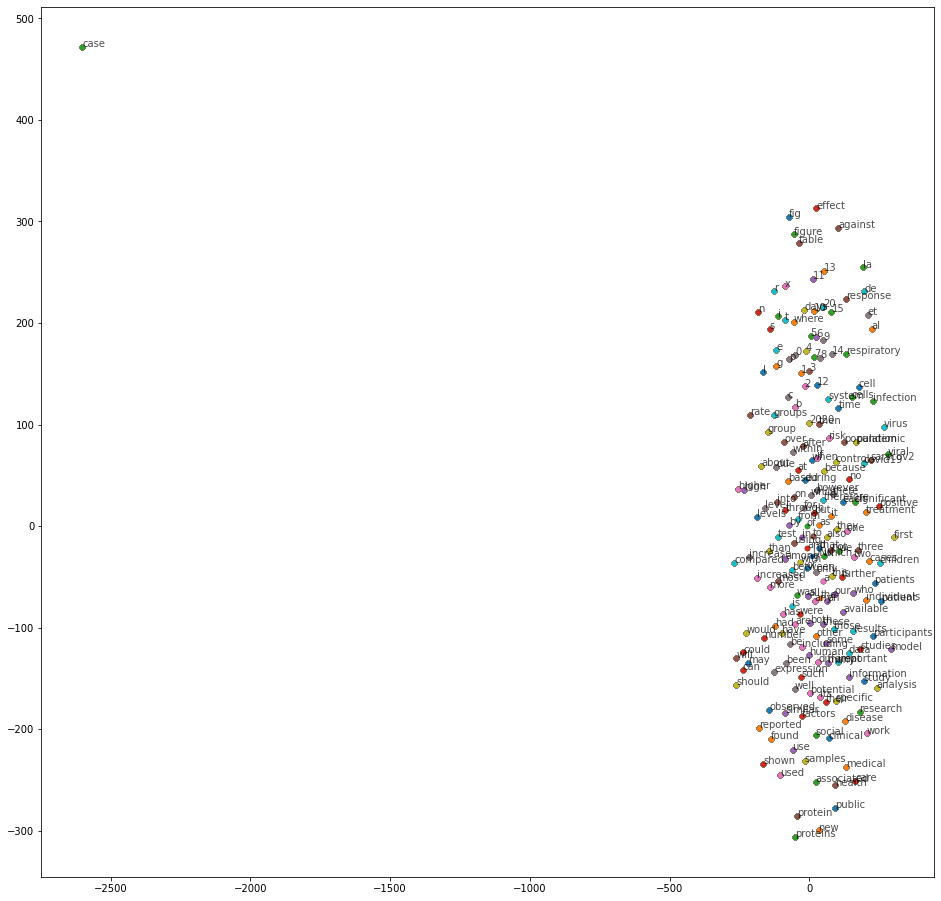

In [16]:
import matplotlib.pyplot as plt

viz_words = 200
embeddings = model.input_embedding.weight.to('cpu').data.numpy()
embed_tsne = tsne(embeddings[:viz_words, :], 2, 300, 30.0)
width = 16
height = 16

fig = plt.figure(figsize=(width, height))
for idx in range(viz_words):
    pylab.scatter(embed_tsne[idx:, 0], embed_tsne[idx:, 1], 20)
    pylab.annotate(model.index_to_vocab[idx], (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)
pylab.show()

### 2. Visualise the Word Representations of Biomedical Entities by t-SNE

#### For simplicity, we select Biomedical Entity whose length are one.

In [17]:
def selectSingleWordBioEntity(biomedical_entity_list=[]):
    biomedical_entity = []
    biomedical_entity_index = []
    
    for item in biomedical_entity_list:
        item_list_temp = item.split(' ')
        if len(item_list_temp) == 1:
            if item in model.vocab_to_index:
                biomedical_entity.append(item)
                biomedical_entity_index.append(model.vocab_to_index[item])
    
    return biomedical_entity, biomedical_entity_index

In [18]:
biomedical_entity_list, biomedical_entity_index_list = selectSingleWordBioEntity(biomedical_entity)
print(biomedical_entity_index_list)
print(len(biomedical_entity_index_list))

[35, 9716, 2749, 9675, 9122, 1487, 6843, 3649, 2277, 8910, 8799, 2216, 9956, 8358, 4936, 4635, 1243, 7326, 5757, 3292, 3502, 99, 5086, 1076, 8862, 8161, 2790, 6896, 2922, 5018, 6867, 4832, 5597, 2603, 1421, 1675, 9787, 9540, 9202, 8255, 902, 9144, 3630, 3525, 4077, 6186, 8768, 7862, 9492, 3625, 140, 117, 2290, 78, 1242, 3381, 596, 8757, 6010, 6161, 7617, 4767, 4438, 6704, 5297, 4437, 8551, 9298, 9582, 4743, 6011, 555, 5031, 4176, 4298, 4848, 8319, 293, 7181, 3372, 2583, 1953, 9259, 6077, 6058, 988, 7286, 5988, 2113, 8436, 8796, 5193, 6535, 9969, 5490, 8556, 5064, 5526, 9910, 9001, 6583, 7608, 2441, 7126, 9698, 9178, 7439, 9694, 2176, 9866, 8183, 9792, 9264, 4907, 5650, 7356, 9235, 3506, 4104, 9945, 6275, 188, 7121, 4007, 4592, 4721, 8719, 4355, 4426, 2259, 5261, 9489, 6631, 6205, 5402, 5789, 8818, 8030, 3360, 1643, 5913, 9941, 4474, 7514, 8140, 7091, 6580, 2693, 9611, 8341, 3626, 5938, 3787, 9371, 7383, 7276, 4378, 6242, 4137, 6212, 7897, 5351, 6087, 7165, 7685, 5053, 7505, 4747, 5251,

In [20]:
import matplotlib.pyplot as plt

embeddings = model.input_embedding.weight.to('cpu').data.numpy()
embed_tsne = tsne(embeddings[biomedical_entity_index_list, :], 2, 300, 30.0)
width = 16
height = 16

fig = plt.figure(figsize=(width, height))
for idx in range(viz_words):
    plt.scatter(embed_tsne[idx:, 0], embed_tsne[idx:, 1], 20)
    for item in biomedical_entity_list:
        if biomedical_entity_label_dict[item] == "GENE_OR_GENE_PRODUCT":
            plt.annotate(item, (embed_tsne[idx, 0], embed_tsne[idx, 1]), color='green')
        elif biomedical_entity_label_dict[item] == "ORGANISM":
            plt.annotate(item, (embed_tsne[idx, 0], embed_tsne[idx, 1]), color='red')
        elif biomedical_entity_label_dict[item] == "AMINO_ACID":
            plt.annotate(item, (embed_tsne[idx, 0], embed_tsne[idx, 1]), color='blue')
        elif biomedical_entity_label_dict[item] == "CANCER":
            plt.annotate(item, (embed_tsne[idx, 0], embed_tsne[idx, 1]), color='yellow')
        elif biomedical_entity_label_dict[item] == "ORGAN":
            pylab.annotate(item, (embed_tsne[idx, 0], embed_tsne[idx, 1]), color='purple')
        elif biomedical_entity_label_dict[item] == "TISSUE":
            pylab.annotate(item, (embed_tsne[idx, 0], embed_tsne[idx, 1]), color='orange')
        elif biomedical_entity_label_dict[item] == "CELL":
            pylab.annotate(item, (embed_tsne[idx, 0], embed_tsne[idx, 1]), color='black')
        elif biomedical_entity_label_dict[item] == "IMMATERIAL_ANATOMICAL_ENTITY":
            pylab.annotate(item, (embed_tsne[idx, 0], embed_tsne[idx, 1]), color='pink')
        else:
            plt.annotate(item, (embed_tsne[idx, 0], embed_tsne[idx, 1]), color='black')
plt.show()

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 1769...
Computing P-values for point 500 of 1769...
Computing P-values for point 1000 of 1769...
Computing P-values for point 1500 of 1769...
Mean value of sigma: 1.781485
Iteration 10: error is 26.153259
Iteration 20: error is 27.047469
Iteration 30: error is 33.266221
Iteration 40: error is 33.468102
Iteration 50: error is 32.392484
Iteration 60: error is 33.926425
Iteration 70: error is 33.907953
Iteration 80: error is 33.145664
Iteration 90: error is 34.830337
Iteration 100: error is 32.369658
Iteration 110: error is 6.427383
Iteration 120: error is 5.649303
Iteration 130: error is 5.215962
Iteration 140: error is 4.859035
Iteration 150: error is 4.685819
Iteration 160: error is 4.305706
Iteration 170: error is 4.010892
Iteration 180: error is 3.950141
Iteration 190: error is 3.905087
Iteration 200: error is 3.890862
Iteration 210: error is 3.879183
Iteration 220: error is 3.865558

KeyboardInterrupt: 

### 3. Co-occurence

In [21]:
import numpy as np
import re
import spacy
import os
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize


def cooccure(list, singleEntity):
    # create co-occurence matrix
    results = []
    for text in list:
        result_text = ""
        text = re.sub('([\n])', " ", text)
        text = re.sub(r'[^A-Za-z/s ]+', ' ', text)

        for word in text.split(" "):
            if word in singleEntity:
                result_text += word
                result_text += " "
        results.append(result_text)

    vocab = []

    for i in results:
        for word in i.split(" "):
            if word not in vocab:
                if(word != " "):
                    vocab.append(word)

    x = len(vocab)
    
    # create 2-dimensional matrix
    matrix = [[0 for x in range(x + 1)] for y in range(x + 1)]

    for i in range(0, x):
        matrix[0][i + 1] = vocab[i]
    for j in range(0, x):
        matrix[j + 1][0] = vocab[j]
        
    rank = []

    for i in range(1, x + 1):  # range of i is between 1 and the number of vocabulary
        for j in range(1, x + 1 - i):  # range of n is between 1 and (vocabulary_size - i)
            word1 = vocab[i - 1]
            word2 = vocab[i + j - 1]
            Common_weight = 0

            for result_text in results:
                if word1 in result_text and word2 in result_text:
                    Common_weight += 1

            matrix[i][i + j] = Common_weight  # the matrix is a diagonal matrix
            matrix[i + j][i] = Common_weight

            list = [word1, word2, Common_weight]
            rank.append(list)

    rank = sorted(rank, key=lambda x: x[2], reverse=True)

    print("the 10 most frequently co-occured biomedical terms: \n", rank[:10])

    return matrix

### Print out the co-occurence matrix

In [22]:
print("The co-occurrence matrix is:",
      np.array(cooccure(text, biomedical_entity_list), dtype=object))

KeyboardInterrupt: 

### 4. Sementic Similarity

The sementic similarity is achieved through acquiring all the word vectors of single-word biomedical entity, and then by compare the word vector of "covid19" with their's through `consine_similarity(target, comparison_list)`

In [32]:
import torch

input_embedding_list = model.get_list_vector()

def cosine_similarity(target, comparison_list):
    
    attention_distribution = []
 
    for i in range(comparison_list.size(0)):
        attention_score = torch.cosine_similarity(target, comparison_list[i].view(1, -1))
        attention_distribution.append(attention_score)
    attention_distribution = torch.Tensor(attention_distribution)
 
    return attention_distribution / torch.sum(attention_distribution, 0)

covid_vector = torch.FloatTensor(input_embedding_list[model.vocab_to_index["covid19"]])
biomedical_entity_vector_list = []
for item in biomedical_entity:
    if item in model.vocab_to_index:
        biomedical_entity_vector_list.append(input_embedding_list[model.vocab_to_index[item]])

biomedical_entity_vector_list = torch.FloatTensor(biomedical_entity_vector_list)

similarity_tensor_list = cosine_similarity(target=covid_vector, comparison_list=biomedical_entity_vector_list)
values, indices = torch.topk(similarity_tensor_list, 6, largest=True, sorted=True)
values, indices = values.to("cpu"), indices.to("cpu")

closest_entity = []
for i in indices:
        closest_entity.append(biomedical_entity[i])
print("Six closest biomedical entities that have semantic similarity to " + "covid-19" + ": " + ', '.join(closest_entity))    

Six closest biomedical entities that have semantic similarity to covid-19: virus  the, ccid5, urd   2deoxycytidine  dcyd, arginase1, eulermurayama, formaldehyde


## Part 5 (Bonus +10%): Open Challenge: Mining Biomedical Knowledge

A fundamental task in clinical/biomedical natural language processing is to extract intelligence from biomedical text corpus automatically and efficiently. More specifically, the intelligence may include biomedical entities mentioned in text, relations between biomedical entities, clinical features of patients, progression of diseases, all of which can be used to predict, understand and improve patients' outcomes. 

This open challenge is to build a biomedical knowledge graph based on the CORD-19 dataset and mine useful information from it. We recommend the following steps but you are also encouraged to develop your solution from scratch.

### Extract Biomedical Entities from Text

Extract biomedical entities (such as fever, cough, headache, lung cancer, heart attack) from text. Note that:

- The biomedical entities may consist of multiple words. For example, heart attack, multiple myeloma etc.
- The biomedical entities may be written in synoynms. For example, low blood pressure for hypotension.
- The biomedical entities may be written in different forms. For example, smoking, smokes, smoked.

### Extract Relations between Biomedical Entities

Extract relations between biomedical entities based on their appearance in text. You may define a relation between biomedical entities by one or more of the following criteria:

- The biomedical entities frequentely co-occuer together.
- The biomedical entities have similar word representations.
- The biomedical entities have clear relations based on textual narratives. For example, "The most common symptoms for COVID-19 are fever and cough" so we know there are relations between "COVID-19", "fever" and "cough".

### Build a Biomedical Knowledge Graph of COVID-19

Build a knoweledge graph based on the results from track 5.1 and 5.2 and visualise it.

In [5]:
###################
# TODO: add your solution

#build knowledge graph
import spacy
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from spacy.matcher import Matcher
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import re

def get_entities(sent):
    ## chunk 1
    ent1 = ""
    ent2 = ""

    prv_tok_dep = ""  # dependency tag of previous token in the sentence
    prv_tok_text = ""  # previous token in the sentence

    prefix = ""
    modifier = ""

    for tok in nlp(sent):
        ## chunk 2
        # if token is a punctuation mark then move on to the next token
        if tok.dep_ != "punct":
            # check: token is a compound word or not
            if tok.dep_ == "compound":
                prefix = tok.text
                # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    prefix = prv_tok_text + " " + tok.text

            # check: token is a modifier or not
            if tok.dep_.endswith("mod") == True:
                modifier = tok.text
                # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    modifier = prv_tok_text + " " + tok.text

            ## chunk 3
            if tok.dep_.find("subj") == True:
                ent1 = modifier + " " + prefix + " " + tok.text
                prefix = ""
                modifier = ""
                prv_tok_dep = ""
                prv_tok_text = ""

                ## chunk 4
            if tok.dep_.find("obj") == True:
                ent2 = modifier + " " + prefix + " " + tok.text

            ## chunk 5
            # update variables
            prv_tok_dep = tok.dep_
            prv_tok_text = tok.text

    return [ent1.strip(), ent2.strip()]


def get_relation(sent):

    doc = nlp(sent)

    # Matcher class object
    matcher = Matcher(nlp.vocab)

    #define the pattern
    pattern = [{
        'DEP': 'ROOT'
    }, {
        'DEP': 'prep',
        'OP': "?"
    }, {
        'DEP': 'agent',
        'OP': "?"
    }, {
        'POS': 'ADJ',
        'OP': "?"
    }]

    matcher.add("matching_1", [pattern], on_match=None)

    matches = matcher(doc)
    k = len(matches) - 1

    span = doc[matches[k][1]:matches[k][2]]

    return (span.text)

nlp = spacy.load('en_core_web_md')

# extract relations
entity_pairs = []
for i in tqdm(final_text_list):
    entity_pairs.append(get_entities(i))

relations = [get_relation(i) for i in tqdm(final_text_list)]

# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source': source, 'target': target, 'edge': relations})

#print the source, target, relation we got from the text file
print(kg_df)  

# create a directed-graph from a dataframe
G = nx.from_pandas_edgelist(kg_df,
                            "source",
                            "target",
                            edge_attr=True,
                            create_using=nx.MultiDiGraph())

plt.figure(figsize=(12, 12))

pos = nx.spring_layout(G)
nx.draw(G,
        with_labels=True,
        node_color='lightblue',
        edge_cmap=plt.cm.Blues,
        pos=pos)
plt.show()  #show knowledge graph

###################